## Google Play Store apps and reviews


In [ ]:
# Read in dataset
import pandas as pd
import numpy as np

df = pd.read_csv('/content/apps.csv')

In [ ]:
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data cleaning


In [ ]:
df.shape

(9659, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Rating,Reviews
count,9659.000000,8196.000000,9.659000e+03
mean,5666.172896,4.173243,2.165926e+05
std,3102.362863,0.536625,1.831320e+06
min,0.000000,1.000000,0.000000e+00
25%,3111.500000,4.000000,2.500000e+01
50%,5814.000000,4.300000,9.670000e+02
75%,8327.500000,4.500000,2.940100e+04
max,10840.000000,5.000000,7.815831e+07


In [ ]:
# Drop duplicates
apps = df.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7855,8974,Hotel Insanity,GAME,4.2,3816,31M,"100,000+",Free,0,Teen,Arcade,"July 7, 2016",1.0,3.0 and up
6324,7371,Valmet CI Tool,BUSINESS,NaN,1,3.7M,500+,Free,0,Everyone,Business,"March 13, 2018",0.0.6,4.0 and up
4732,5715,AV Pro Voice Changer,FAMILY,3.5,174,5.6M,"50,000+",Free,0,Everyone,Entertainment,"June 29, 2016",1.0.3,4.0 and up
3982,4923,AC Remote for Midea - NOW FREE,TOOLS,4.0,448,26M,"100,000+",Free,0,Everyone,Tools,"July 30, 2018",6.1.7,4.2 and up
9618,10800,FR Roster,TOOLS,4.1,174,12M,"5,000+",Free,0,Everyone,Tools,"July 30, 2018",6.04,4.4 and up


In [ ]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

## Exploring app categories


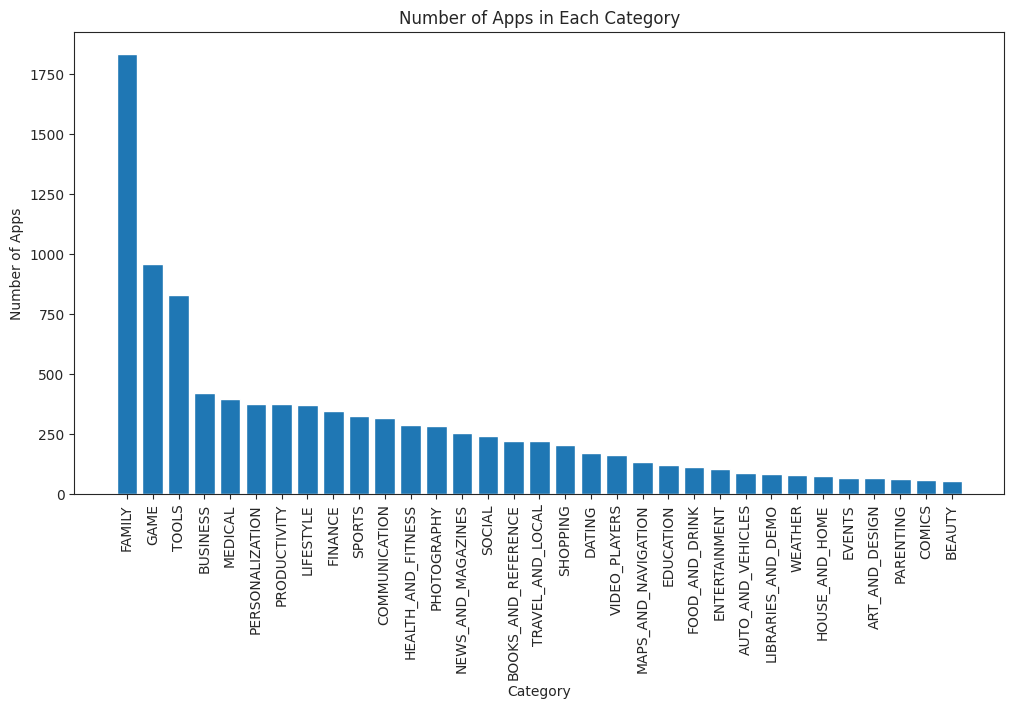

In [ ]:
import matplotlib.pyplot as plt

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(num_apps_in_category.index, num_apps_in_category.values)

# Adding title and labels
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

# Rotate category names for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


## Distribution of app ratings


Average app rating =  4.173243045387994


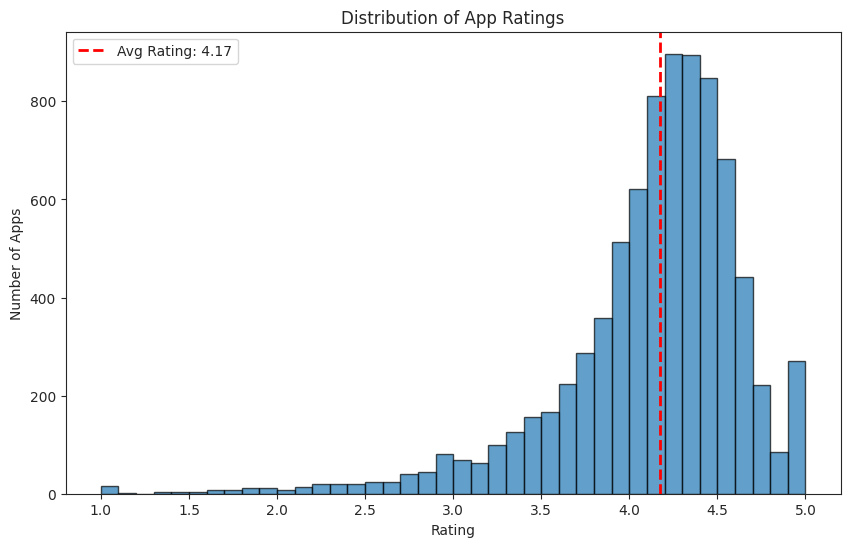

In [ ]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Plot the histogram for app ratings
plt.figure(figsize=(10, 6))
plt.hist(apps['Rating'], bins=np.arange(1, 5.1, 0.1), edgecolor='black', alpha=0.7)

# Add vertical dashed line for the average app rating
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=2, label=f'Avg Rating: {avg_app_rating:.2f}')

# Adding title and labels
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')

# Show the legend
plt.legend()

# Display the plot
plt.show()


## Size and price of an app


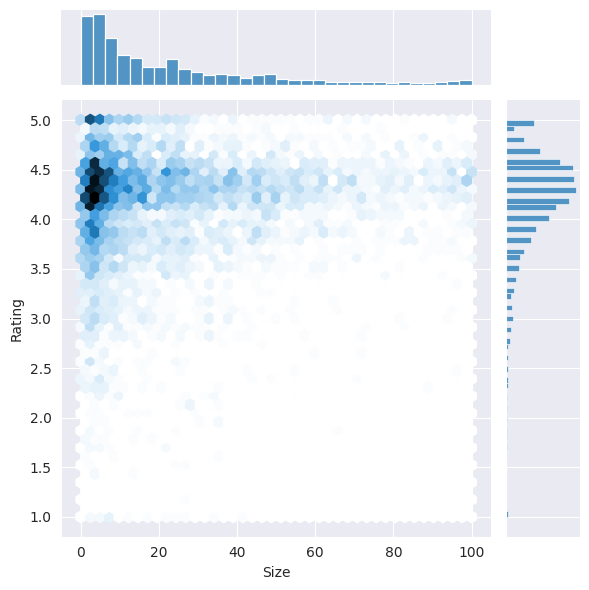

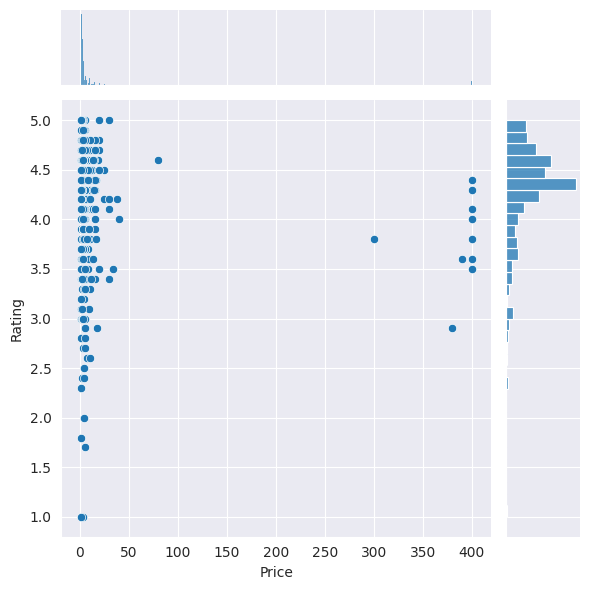

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

## Relation between app category and app price


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


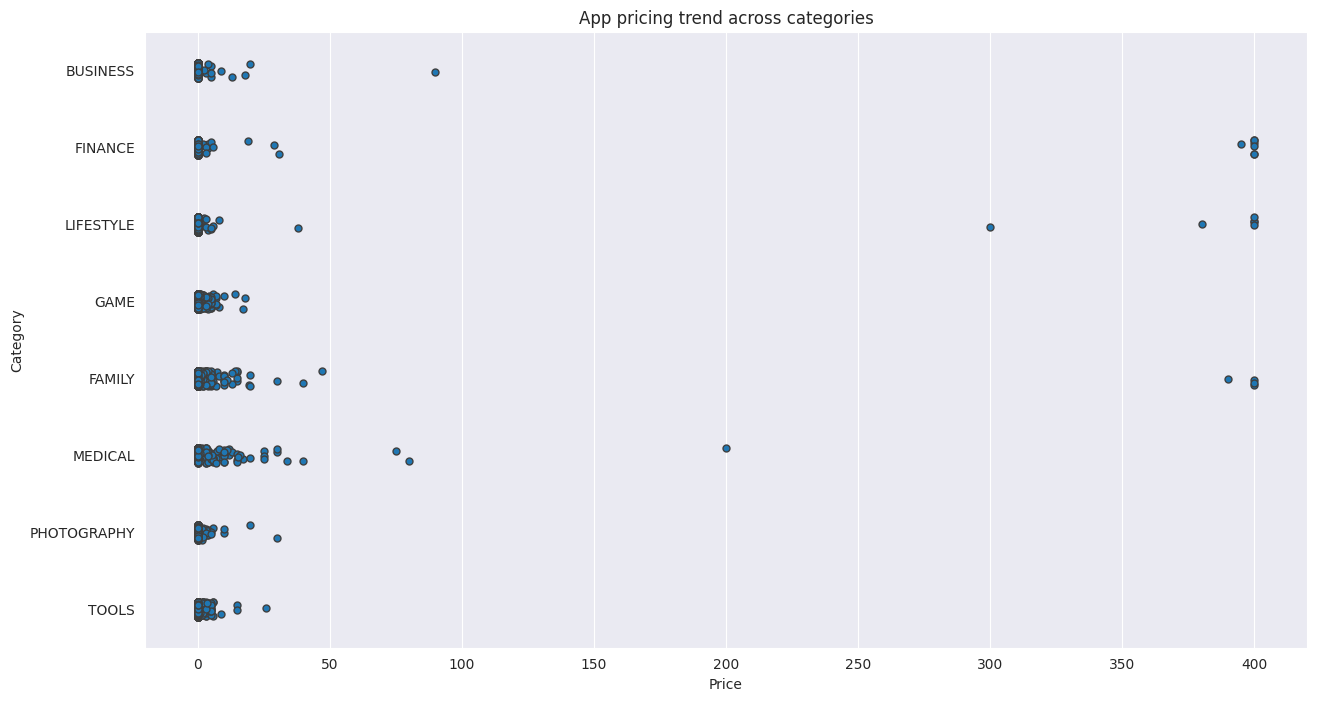

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## Filter out "junk" apps


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

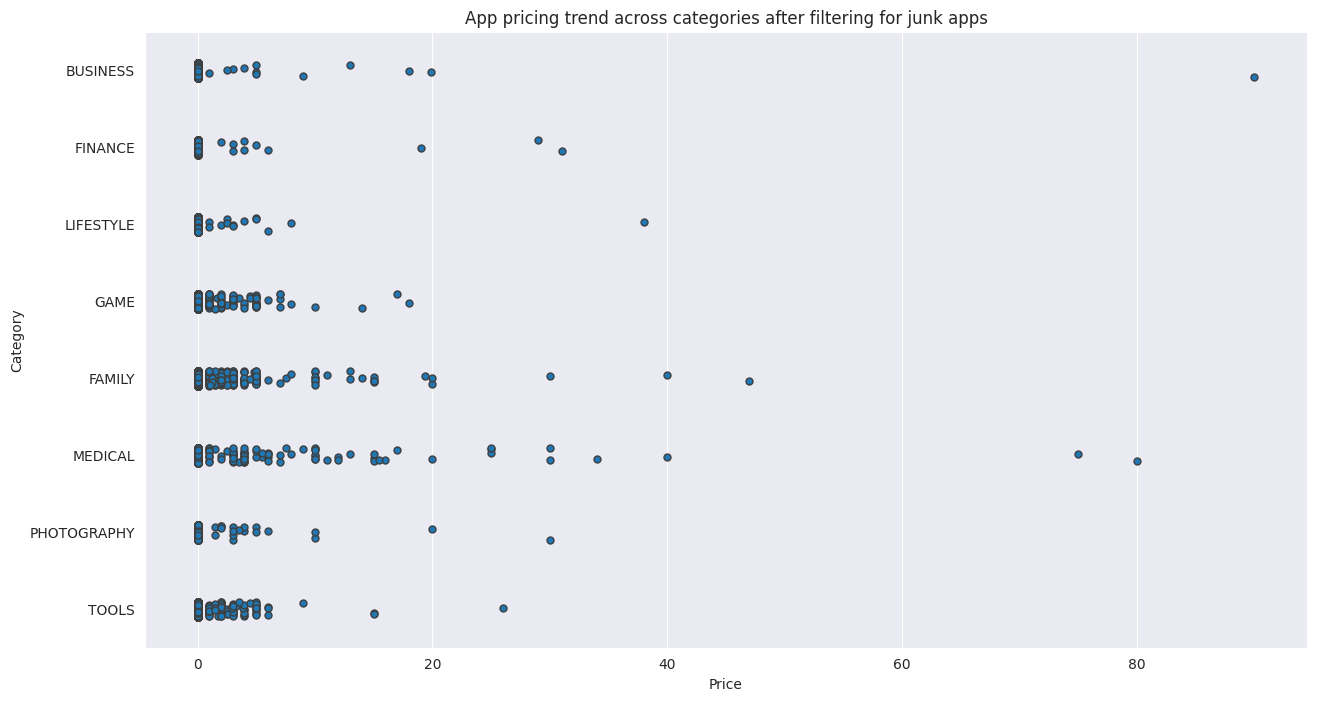

In [ ]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps


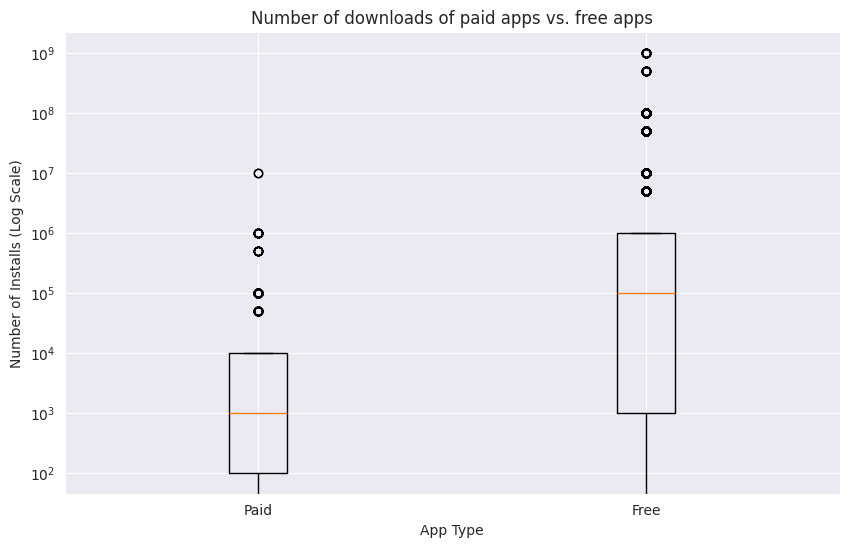

In [ ]:
# Data for paid and free apps
paid_installs = apps['Installs'][apps['Type'] == 'Paid']
free_installs = apps['Installs'][apps['Type'] == 'Free']

# Create a figure
plt.figure(figsize=(10, 6))

# Boxplot for paid and free apps with log scale for the y-axis
plt.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'])

# Set the title and labels
plt.title("Number of downloads of paid apps vs. free apps")
plt.xlabel("App Type")
plt.ylabel("Number of Installs (Log Scale)")

# Set the y-axis to log scale
plt.yscale('log')

# Display the plot
plt.show()


## Sentiment analysis of user reviews


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

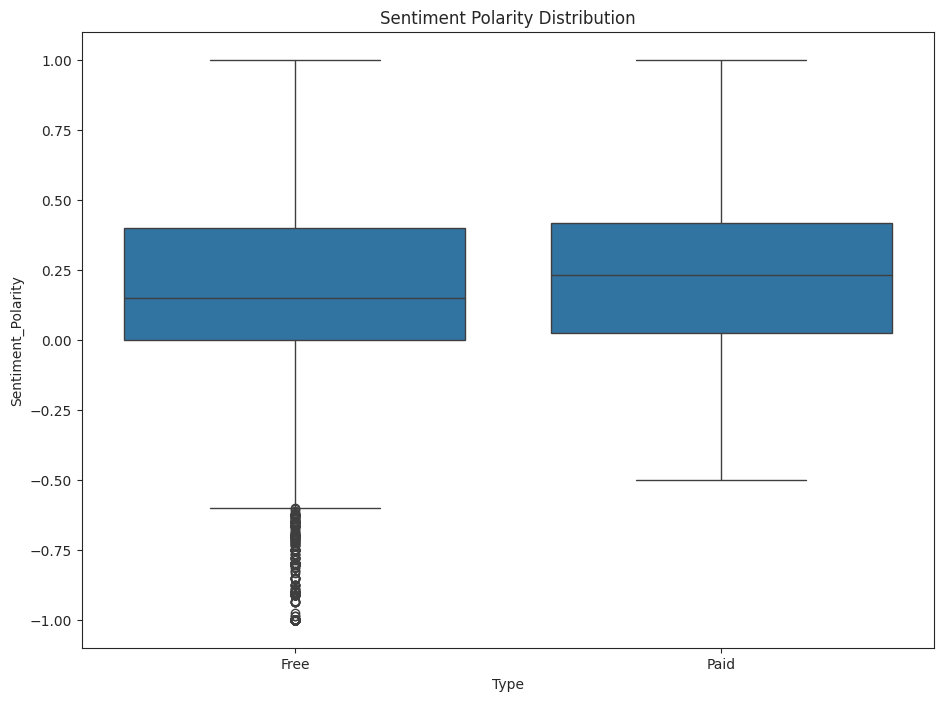

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv('/content/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')